<a href="https://colab.research.google.com/github/JoudyTa/Joudy_Taleb_task_9_exercises.ipynb/blob/master/Joudy_Taleb_task_9_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

# Logistic Regression Project

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [ ]:
df = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

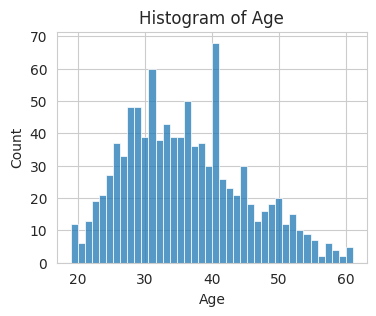

In [ ]:

# Set the figure size
plt.figure(figsize=(4, 3))

# Set seaborn style to include a grid
sns.set_style('whitegrid')

# Plotting histogram using seaborn
sns.histplot(data=df, x='Age', bins=40)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')

# Display the plot
plt.show()

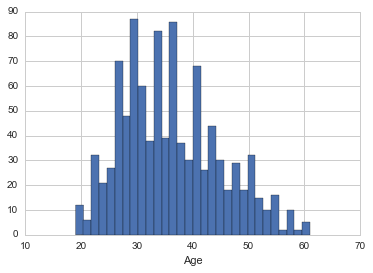

**Create a jointplot showing Area Income versus Age.**

<Figure size 400x200 with 0 Axes>

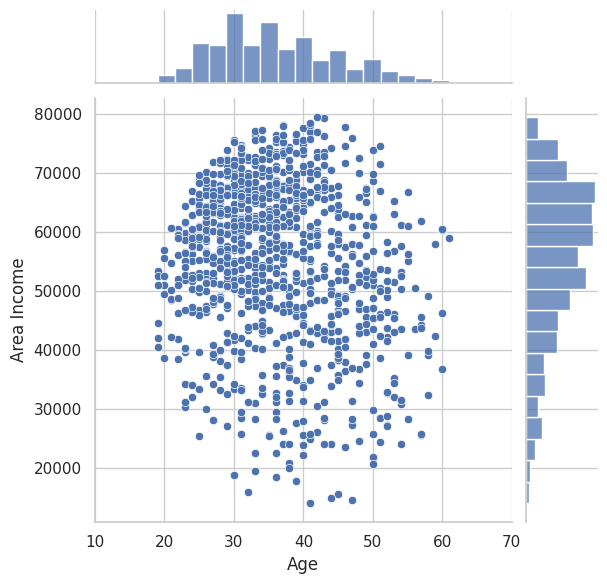

In [ ]:
# Set seaborn style to include a grid
sns.set_style('whitegrid')

# Customize the axis ticks for the Age variable
age_ticks = range(10, 71, 10)

# Set the figure size
plt.figure(figsize=(4, 2))

# Create the jointplot with customized axis ticks
sns.jointplot(data=df, x='Age', y='Area Income', xlim=(10, 70))

# Display the plot
plt.show()

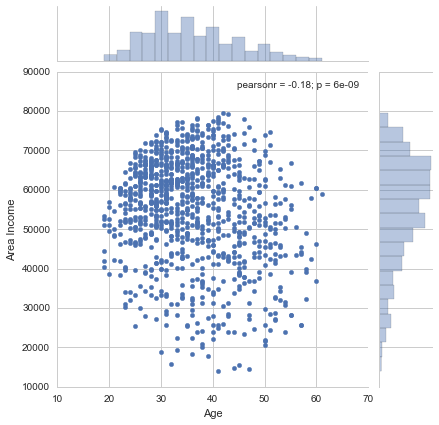

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

<Figure size 600x400 with 0 Axes>

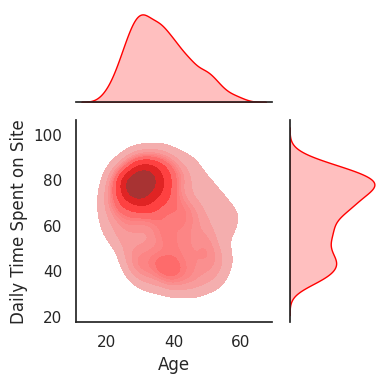

In [ ]:

# Set seaborn style
sns.set(style="white")

# Set the figure size
plt.figure(figsize=(6, 4))

# Create the jointplot with smaller size and red KDE distributions
sns.jointplot(data=df, x='Age', y='Daily Time Spent on Site', kind='kde', height=4, ratio=2, color='red',fill=True)

# Display the plot
plt.show()

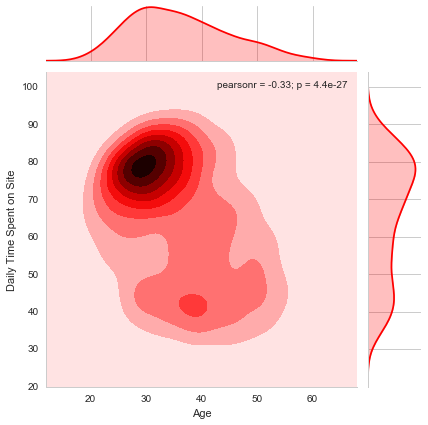

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

<Figure size 900x700 with 0 Axes>

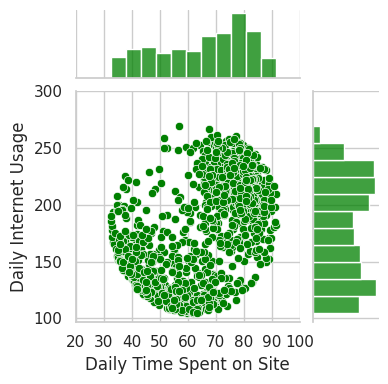

In [ ]:
# Set seaborn style
sns.set(style='whitegrid')

# Set the figure size
plt.figure(figsize=(9, 7))

# Create the jointplot with smaller size, green markers, and grid
g=sns.jointplot(data=df, x='Daily Time Spent on Site', y='Daily Internet Usage', color='green', marker='o', height=4, ratio=3)

# Set custom axis ticks
g.ax_joint.set_xticks(np.arange(20, 110, 10))
g.ax_joint.set_yticks(np.arange(100, 350, 50))

# Display the plot
plt.show()


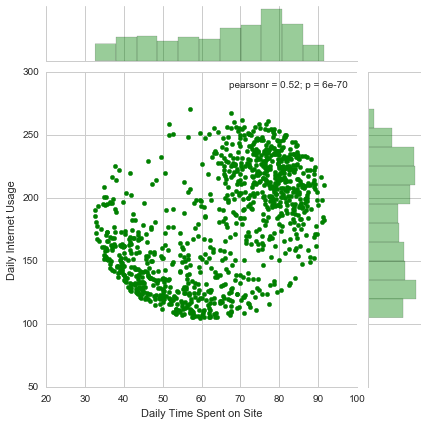

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

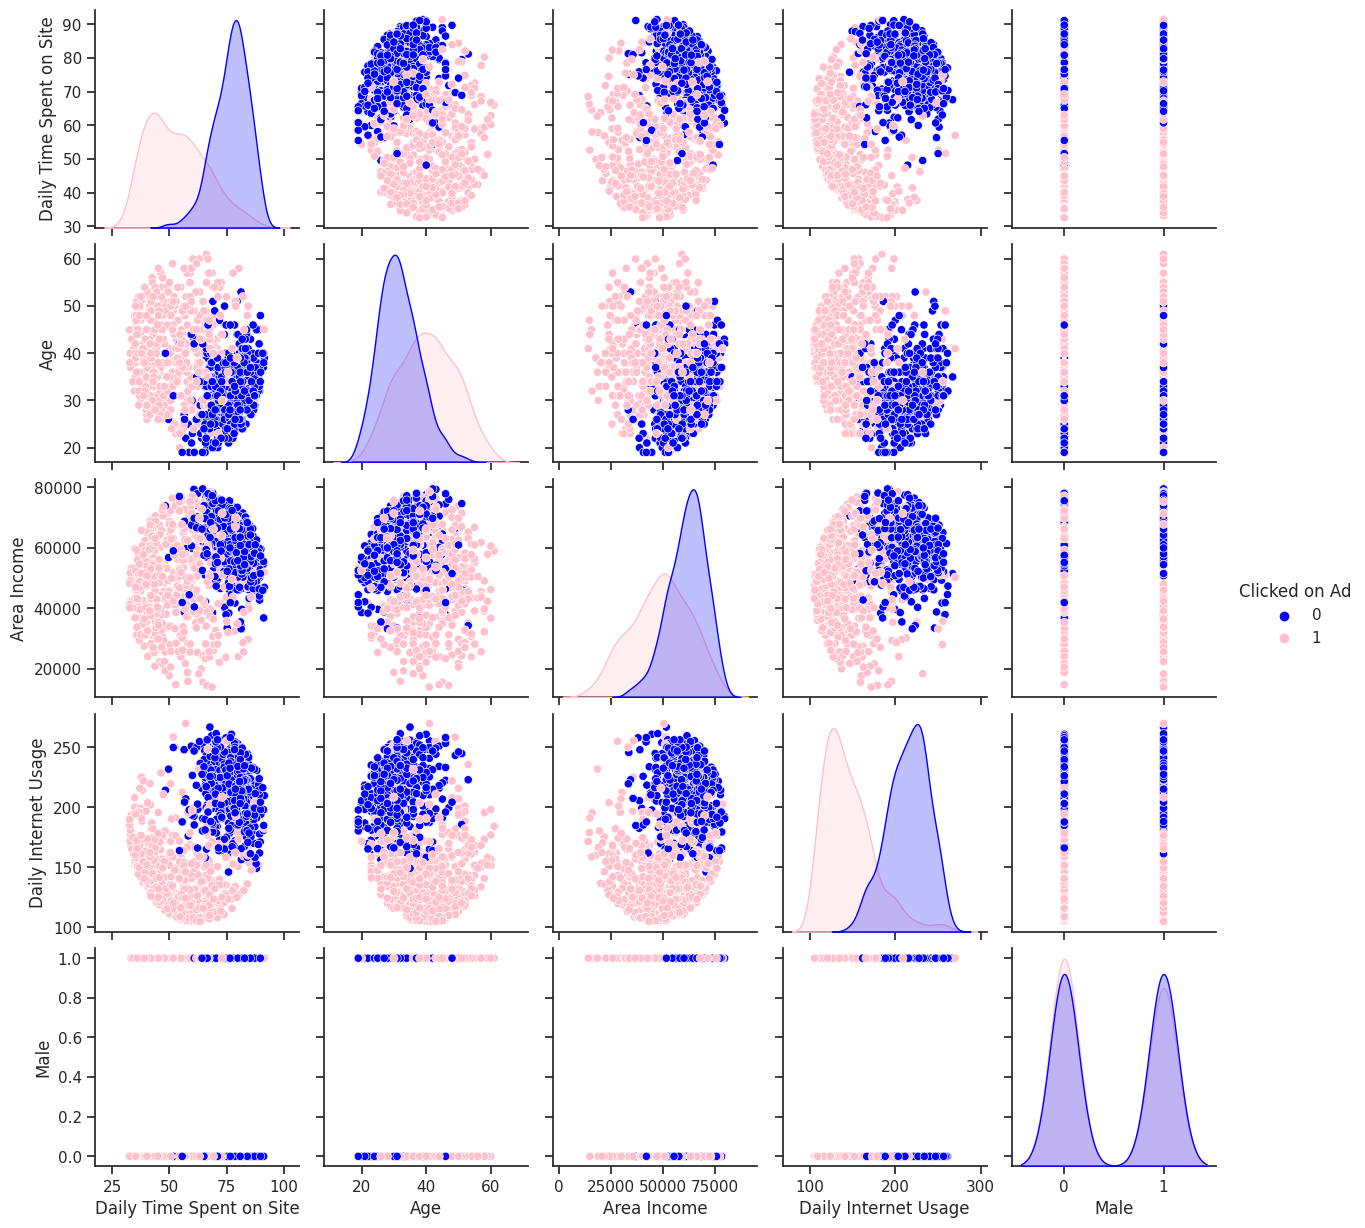

In [ ]:
# Set seaborn style
sns.set(style='ticks')

# Create a color palette with blue and pink
colors = ["blue", "pink"]

# Create the pairplot with hue defined by 'Clicked on Ad' column and custom colors
sns.pairplot(data=df, hue='Clicked on Ad', palette=colors)

# Display the plot
plt.show()

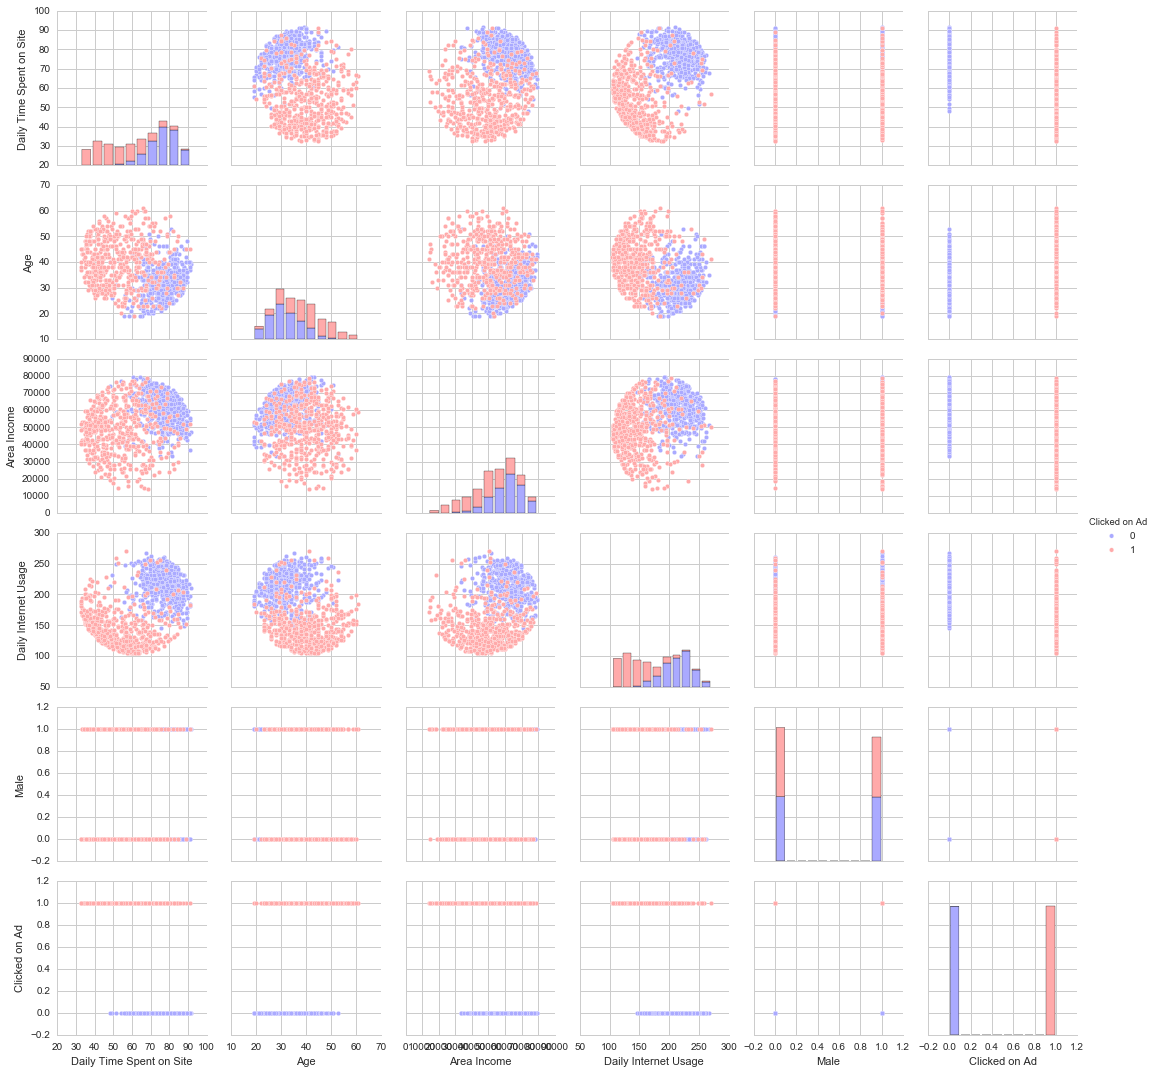

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


feature scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Identify the non-numeric columns
non_numeric_columns = ['Ad Topic Line', 'City', 'Male', 'Country', 'Timestamp']

# Remove non-numeric columns
numeric_df = df.drop(non_numeric_columns, axis=1)

# Perform feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)

# Assuming the target variable is stored in a column named 'Clicked on Ad'
target = df['Clicked on Ad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size=0.2, random_state=42)



** Train and fit a logistic regression model on the training set.**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression model
logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Train the model on the training data
logreg.fit(X_train, y_train)


LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [ ]:
# Print the string representation of the model
print(logreg)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')


logistic regression hyperparameters tuning

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their potential values
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(logreg, hyperparameters, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Train the best model on the training data
best_model.fit(X_train, y_train)


Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

LogisticRegression(C=0.1, multi_class='ovr', n_jobs=1, penalty='l1',
                   solver='liblinear')

## Predictions and Evaluations
** Now predict values for the testing data.**

In [ ]:
# Predict values for the testing data
y_pred = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       111

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



** Create a Confusion Matrix for the model.**

In [ ]:
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[ 89   0]
 [  0 111]]


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy_score(y_pred,y_test)

1.0

In [ ]:
precision_score(y_test,y_pred)

1.0

## k-Nearest Neighbors

In [ ]:
recall_score(y_test,y_pred)

1.0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=1)

# Train the model on the training data
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Make predictions on the testing set
y_pred = knn.predict(X_test)

In [ ]:
# Create the confusion matrix
cm_1 = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_1)


Confusion Matrix:
[[ 89   0]
 [  0 111]]


In [ ]:
accuracy_score(y_pred,y_test)

1.0

In [ ]:
precision_score(y_test,y_pred)

1.0

In [ ]:
recall_score(y_test,y_pred)

1.0

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       111

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



##random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier model
rf_classifier = RandomForestClassifier()

# Train the model on the training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)


In [ ]:
# Create the confusion matrix
cm_2 = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_2)


Confusion Matrix:
[[ 89   0]
 [  0 111]]


In [ ]:
accuracy_score(y_pred,y_test)

1.0

In [ ]:
recall_score(y_test,y_pred)

1.0

In [ ]:
precision_score(y_test,y_pred)

1.0

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       111

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Great Job!